In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pignone_data= pd.read_csv("misure_pignone.csv")
corona_data= pd.read_csv("misure_corona.csv")


pignone= np.array(pignone_data['denti'])
corona= np.array(corona_data['denti'])


rapporti = corona[:, np.newaxis] / pignone

tabella= pd.DataFrame(rapporti, columns= pignone, index=corona)

tabella.to_csv("tabella_rapporti.csv")

tabella

,11,12,13
48,4.363636,4.000000,3.692308
49,4.454545,4.083333,3.769231
50,4.545455,4.166667,3.846154
51,4.636364,4.250000,3.923077
52,4.727273,4.333333,4.000000
53,4.818182,4.416667,4.076923


In [3]:
df_trasposto = tabella.transpose().reset_index()

colonne= ['pignone'] + [str(x) for x in corona]
df_trasposto.columns = colonne

df_finale = pd.melt(df_trasposto, 
                    id_vars=['pignone'], 
                    var_name='corona', 
                    value_name='rapporto')

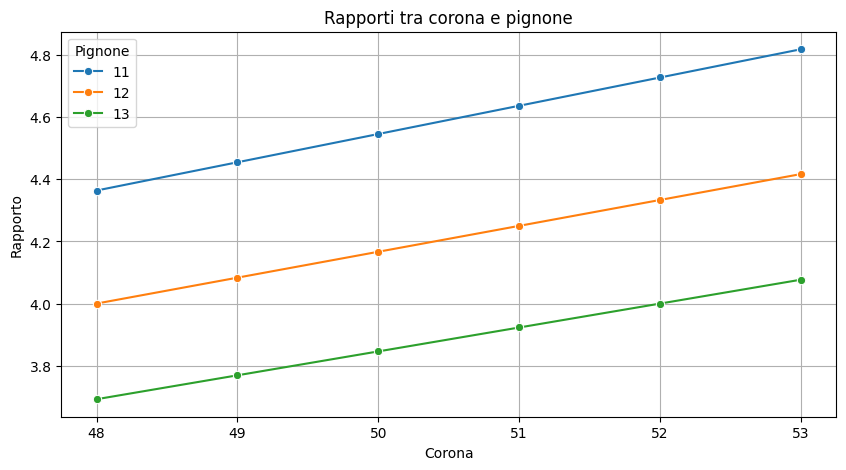

In [4]:
plt.figure(figsize=(10, 5))

sns.lineplot(data=df_finale, 
             x='corona', 
             y='rapporto', 
             hue='pignone', 
             marker='o',
             palette='tab10')

plt.title('Rapporti tra corona e pignone')
plt.xlabel('Corona')
plt.ylabel('Rapporto')
plt.legend(title='Pignone')

plt.grid(True)

plt.savefig('grafico_rapporti.png')

plt.show()
